# Dimensionality Reduction Methods Comparison Task


## Part 1: Generate Roulade Visualizations

### 1. Use the provided roulade generator functions to create 50-100 different visualizations by varying:

- Spiral density (spiral_density parameter)
- Number of points (spiral_steps parameter)
- Layer distance (width parameter)
- Angle between layers (angle parameter)
- Roll density (roll_density parameter)

### 2. For each parameter combination:

- Generate a 3D roulade structure
- Project it to 2D using PCA method
- Save the resulting 2D visualization as an image


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import MDS, TSNE
import umap


class Roulade:
    def __init__(self):
        pass

    # Roulade point generator functions
    def uniform_spiral(self, density=3, steps=100):
        x, y = [], []
        for i in range(steps):
            x.append(
                (i / steps) ** 0.5 * math.cos((i / steps) ** 0.5 * density * np.pi * 2)
            )
            y.append(
                (i / steps) ** 0.5 * math.sin((i / steps) ** 0.5 * density * np.pi * 2)
            )
        return x, y

    def uniform_roll(self, xli, yli, width=7, angle=0.25, density=5, noise_factor=0.05):
        nx, ny, nz, d = [], [], [], []
        d1 = [((x**2 + y**2) ** 0.5) for x, y in zip(xli, yli)]
        for i in range(density):
            nx.extend(
                [
                    (width + x) * math.cos(angle * i / density * np.pi * 2)
                    + (random.random() - 0.5) * noise_factor
                    for x in xli
                ]
            )
            ny.extend(
                [
                    (width + x) * math.sin(angle * i / density * np.pi * 2)
                    + (random.random() - 0.5) * noise_factor
                    for x in xli
                ]
            )
            nz.extend(yli)
            d.extend(d1)
        return nx, ny, nz, d

    def roll_generator(
        self,
        to_array=True,
        spiral_density=3,
        spiral_steps=20,
        width=7,
        angle=0.3,
        density=5,
    ):
        x, y = self.uniform_spiral(density=spiral_density, steps=spiral_steps)
        x, y, z, d = self.uniform_roll(x, y, width=width, angle=angle, density=density)

        if to_array:
            return np.array([x, y, z]).T, d
        else:
            return x, y, z, d

In [2]:
def generate_roulades(num_roulades: int = 50):
    roulade_generator = Roulade()
    for i in range(num_roulades):
        pca = PCA(n_components=2)
        points_3D, d = roulade_generator.roll_generator(
            spiral_density=np.random.randint(1, 11),
            spiral_steps=np.random.randint(20, 200),
            width=np.random.randint(1, 20),
            angle=np.random.uniform(-1, 1),
            density=np.random.randint(1, 20),
        )
        points_2D = pca.fit_transform(points_3D)
        plt.scatter(points_2D[:, 0], points_2D[:, 1])
        plt.savefig(f"images/roulade{i}.png")
        plt.close()

In [6]:
generate_roulades()

## Part 2: Embed Visualization Images Using Dimensionality Reduction

Treat each saved image as a high-dimensional data point (where each pixel is a dimension) and reduce them to 2D using three methods:

### 1.PCA

- Implement basic PCA
- No additional hyperparameters required

### 2. t-SNE

- Implement with at least three different perplexity values (e.g., 5, 30, 50)

### 3. UMAP

- Implement with at least three different combinations of n_neighbors and min_dist
- For example: (n_neighbors=5, min_dist=0.1), (n_neighbors=15, min_dist=0.5), etc.


In [3]:
import pathlib

files = [f for f in pathlib.Path().glob("images/*.png")]

In [4]:
image_vectors = []

for file in files:
    img = plt.imread(file).flatten()
    image_vectors.append(img)
X = np.stack(image_vectors)


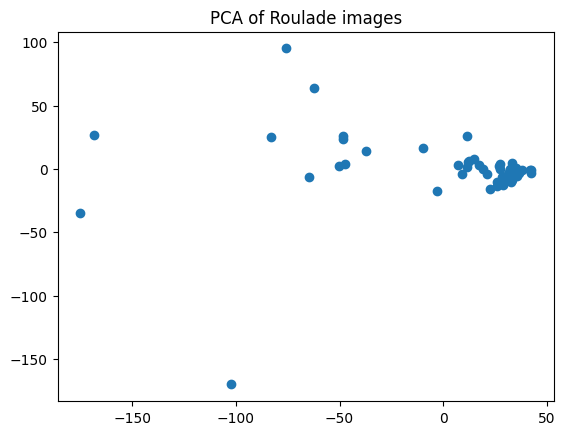

In [5]:
pca_embedding = PCA(n_components=2).fit_transform(X)
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1])
plt.title("PCA of Roulade images")
plt.show()

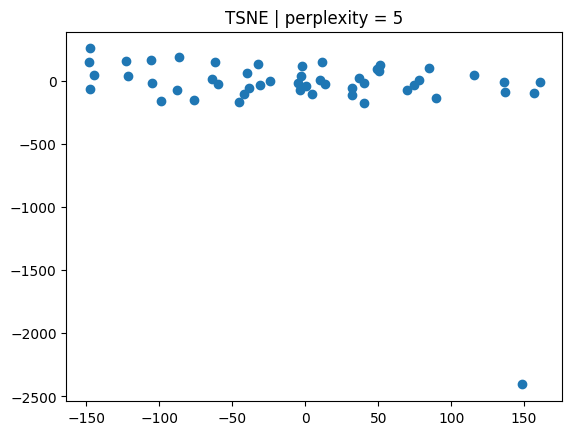

In [6]:
tsne_embedding_5 = TSNE(n_components=2, perplexity=5).fit_transform(X)
plt.scatter(tsne_embedding_5[:, 0], tsne_embedding_5[:, 1])
plt.title("TSNE | perplexity = 5")
plt.show()

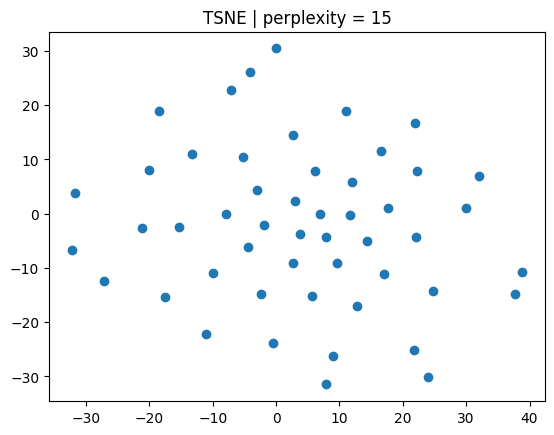

In [7]:
tsne_embedding_15 = TSNE(n_components=2, perplexity=15).fit_transform(X)
plt.scatter(tsne_embedding_15[:, 0], tsne_embedding_15[:, 1])
plt.title("TSNE | perplexity = 15")
plt.show()

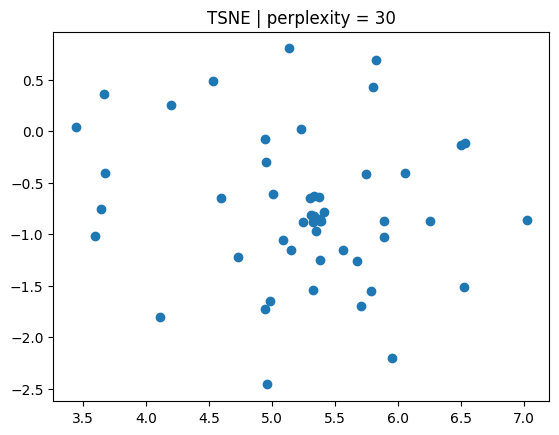

In [8]:
tsne_embedding_30 = TSNE(n_components=2, perplexity=30).fit_transform(X)
plt.scatter(tsne_embedding_30[:, 0], tsne_embedding_30[:, 1])
plt.title("TSNE | perplexity = 30")
plt.show()

In [9]:
umap_embedding_n25_d1 = umap.UMAP(n_neighbors=25, min_dist=1).fit_transform(X)
umap_embedding_n10_d05 = umap.UMAP(n_neighbors=10, min_dist=0.5).fit_transform(X)
umnap_embedding_n5_d01 = umap.UMAP(n_neighbors=5, min_dist=0.1).fit_transform(X)

/Users/nicolas/studia/I_sem/wdzd/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/nicolas/studia/I_sem/wdzd/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/nicolas/studia/I_sem/wdzd/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Part 3: Create Meta-Visualizations

For each dimensionality reduction method:

1. Create a 2D scatter plot of the embedded images
2. Replace each point with a miniature of the original visualization image
3. Include clear labels indicating the parameter settings used for each method


In [14]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image


def create_meta_visualizations(embeddings, files, method, params=None):
    embeddings = np.array([[embedding[0], embedding[1]] for embedding in embeddings])
    image_paths = [file for file in files]

    fig, ax = plt.subplots(figsize=(10, 10))

    for (x, y), img_path in zip(embeddings, image_paths):
        img = Image.open(img_path)
        img = img.resize((100, 100))
        im = OffsetImage(img, zoom=0.2)
        ab = AnnotationBbox(im, (x, y), frameon=False)
        ax.add_artist(ab)

    ax.set_xlim(np.min(embeddings[:, 0]) - 1, np.max(embeddings[:, 0]) + 1)
    ax.set_ylim(np.min(embeddings[:, 1]) - 1, np.max(embeddings[:, 1]) + 1)
    if params is not None:
        ax.set_title(f"Meta-Visualization ({method} | {params})")
    else:
        ax.set_title(f"Meta-Visualization ({method})")
    plt.show()

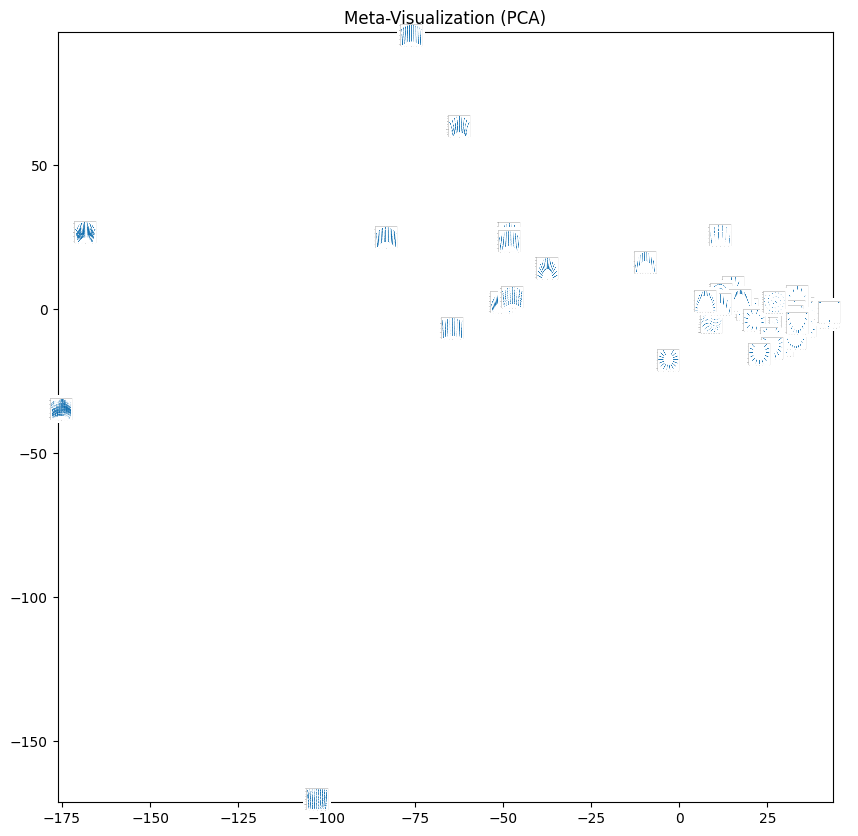

In [15]:
create_meta_visualizations(pca_embedding, files, "PCA")

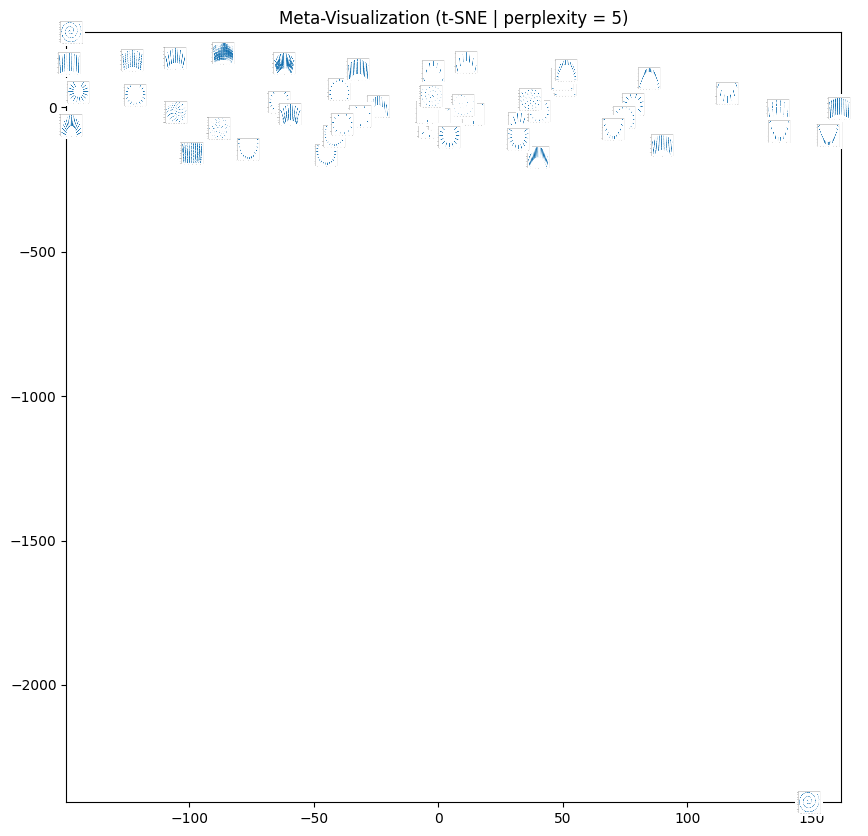

In [16]:
create_meta_visualizations(tsne_embedding_5, files, "t-SNE", "perplexity = 5")

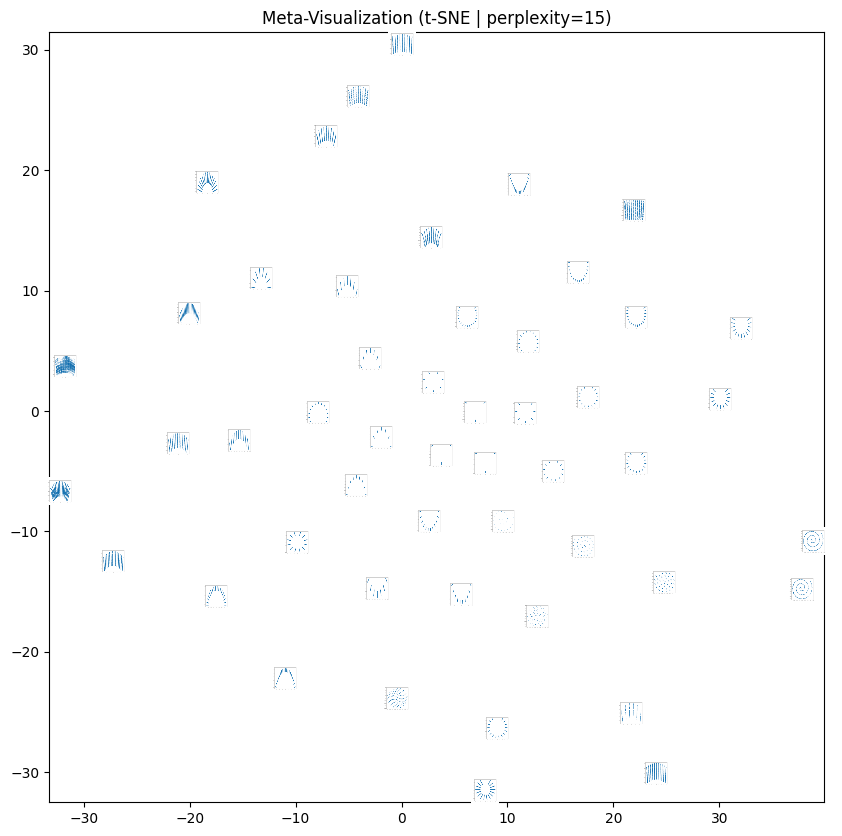

In [17]:
create_meta_visualizations(tsne_embedding_15, files, "t-SNE", "perplexity=15")

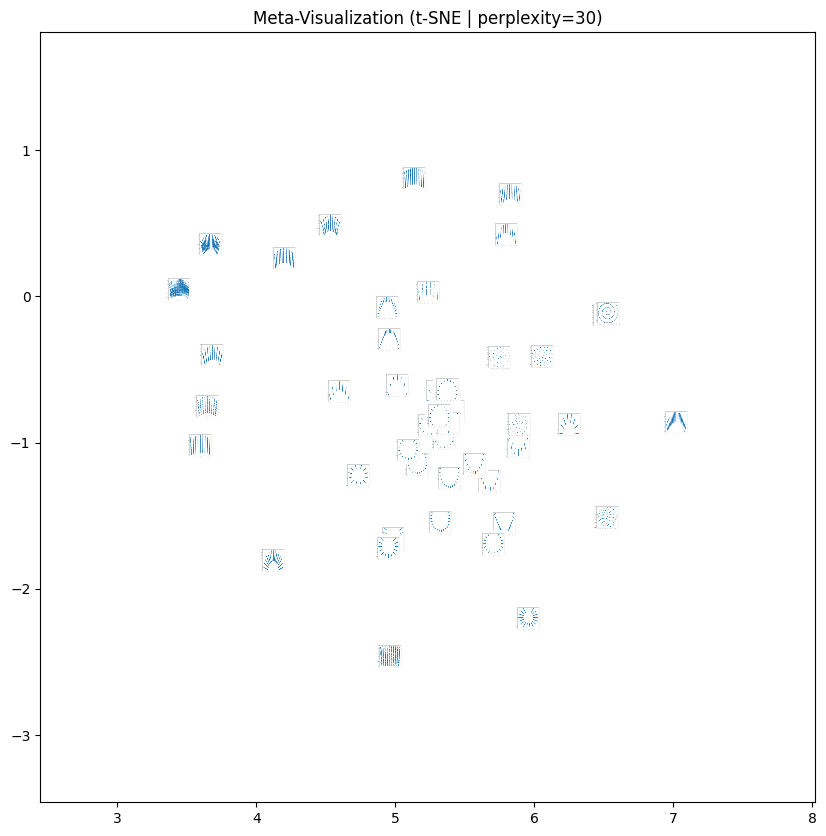

In [18]:
create_meta_visualizations(tsne_embedding_30, files, "t-SNE", "perplexity=30")

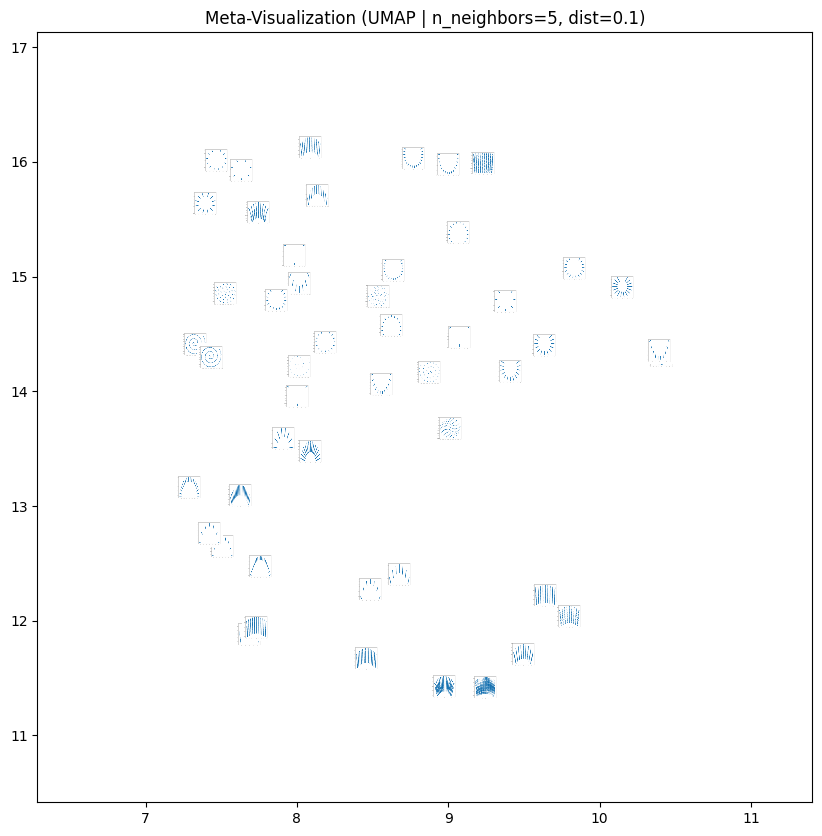

In [19]:
create_meta_visualizations(
    umnap_embedding_n5_d01, files, "UMAP", "n_neighbors=5, dist=0.1"
)

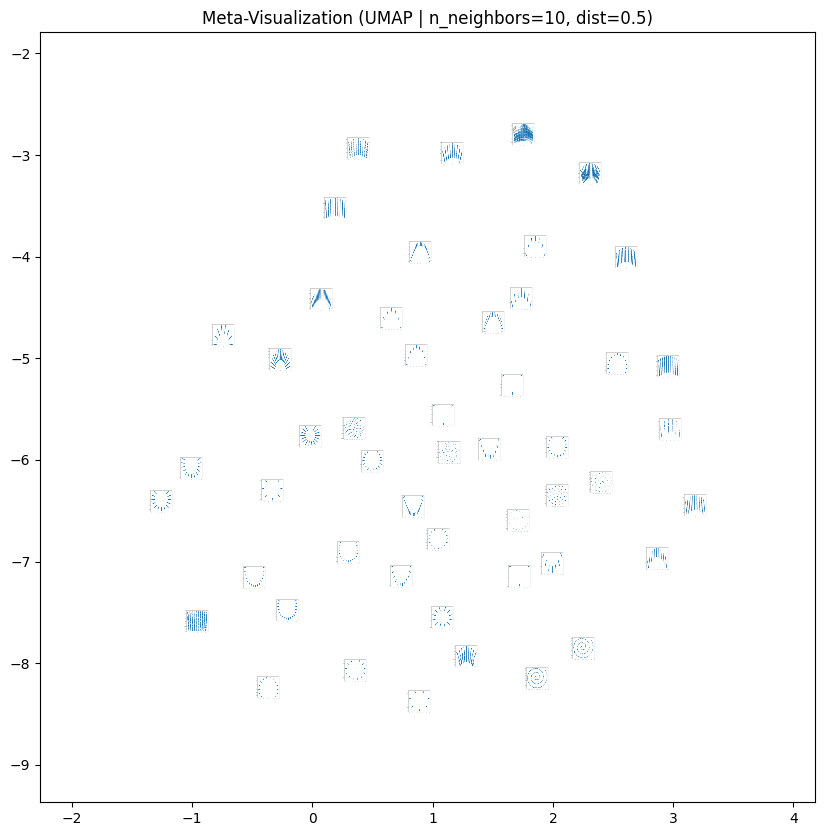

In [20]:
create_meta_visualizations(
    umap_embedding_n10_d05, files, "UMAP", "n_neighbors=10, dist=0.5"
)

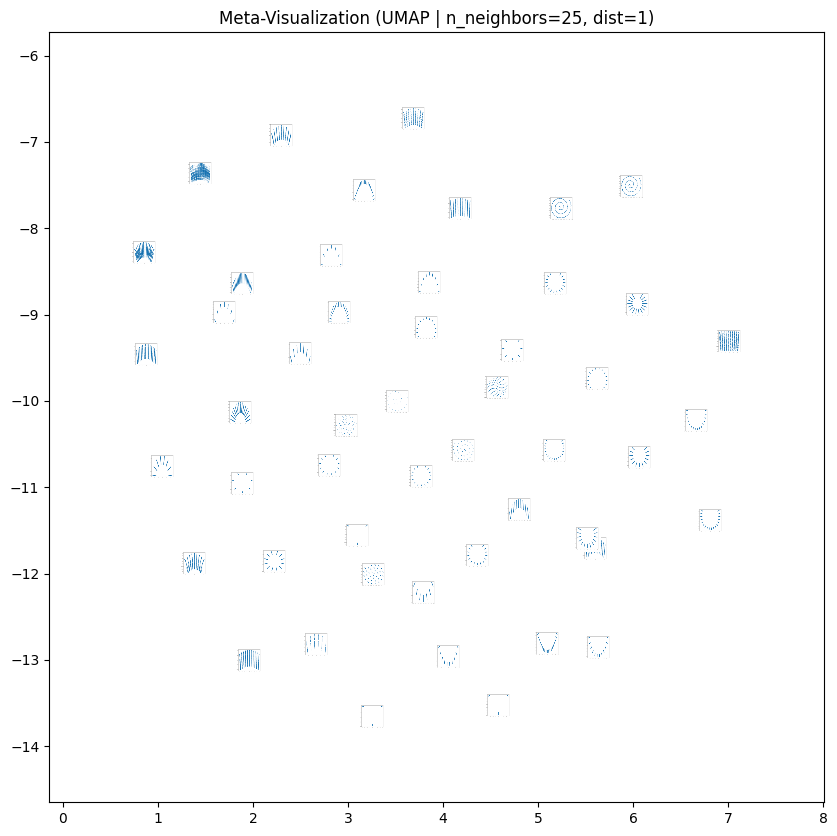

In [21]:
create_meta_visualizations(
    umap_embedding_n25_d1, files, "UMAP", "n_neighbors=25, dist=1"
)

## Part 4: Analysis

Write a 300-500 word analysis that addresses:

- Which method best preserves the spiral structure of the original roulade?
- How do different hyperparameter settings affect the results?
- What patterns can you observe in how similar visualizations are grouped?
- How do the quantitative results from the cf metric align with visual assessments?


Among the dimensionality reduction methods evaluated—PCA, t-SNE, and UMAP—**t-SNE with a perplexity of 15** appears to best preserve the original data structure <br>
based on both visual assessments and the quantitative **class fidelity (cf)** metric. The cf metric, which measures how well local neighborhoods are preserved, <br>
shows that t-SNE consistently achieves the highest scores, especially for smaller numbers of neighbors. <br>
This aligns well with the visual plots, where t-SNE clearly maintains distinct and compact clusters that closely resemble the original class distributions.<br>

Hyperparameters play a significant role in the outcome of both t-SNE and UMAP. For t-SNE, **perplexity** controls the balance between local and global structure. <br>
A **perplexity of 5** tends to overemphasize local detail, often resulting in fragmented and overly tight clusters. On the other hand, a **perplexity of 30** smooths out the embedding, <br>
possibly blending class boundaries. **Perplexity 15** offers a balanced representation, effectively preserving both neighborhood integrity and broader class layout.<br>

For UMAP, the **n_neighbors** parameter determines the local versus global emphasis, while **min_dist** controls how tightly points are packed in the low-dimensional space. <br>
The setting **(n_neighbors=5, min_dist=0.1)** leads to very tight, distinct clusters, but sometimes at the expense of inter-class relationships. <br>
The setting **(n_neighbors=15, min_dist=0.5)** results in a more globally cohesive layout but with slightly fuzzier class boundaries. <br>
The setting **(n_neighbors=25, min_dist=1)** results in a globally cohesive layout with clear class boundaries. Overall, it's a good choice of method and a set of parameters too.

When comparing visual groupings with cf metric results, there's a clear alignment: methods that visually show tight, <br>
well-separated clusters (like t-SNE with optimal perplexity or UMAP with high number of n_neigbors) tend to score higher on class fidelity. <br>
PCA, lacking nonlinear modeling capacity, shows overlapping class distributions and scores lowest on the cf metric, <br>
highlighting its limitation in preserving neighborhood structure for complex manifolds like MNIST digits.